# Ejercicio de Regresión Logística en Python
Para comenzar se realizan las import necesarios de los paquetes que se utilizanran durante el ejercicio.

## Carlos Antonio Rascon Carlos 16111750 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model 
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Carga del archivo csv (datos de entrada) 

El archivo csv (por simplicidad, se considera que estara en el mismo directorio que el archivo de notebook.ipyn) y se asigna mediante Panda a la variable dataframe. al utilizar el metodo dataframe.head() se visualiza en pantalla 5 primeros registros.

In [5]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuacion se utiliza el metodo dataframe.describe() que proporciona estadistica descriptiva del conjunto de datos: media, desviacion estandar, valores minimo y maximo de cada atributo.

In [6]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


s usuaruis se cuantifican resultados de cada tipo usando la funcion groupby y se visualizan 86 usuaruis "Clase 0", es decir Windows, 40 usuarios Mac y 44 de Linux.  

In [7]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualizamos los datos 

Se realiza una visualizacion para conocer a los atributos caracterisiticos de la informacion que se trabaja y su correlación. 

En formato de histograma a parecen los cuatro atributos de entrada etiquetados como: "duracion", "paginas", "acciones" y "valor". Se puede apreciar graficamente entre que valores se comprenden sus minimos y maximos y enq ue intervalos se conenctra la mator densidad de registros. 

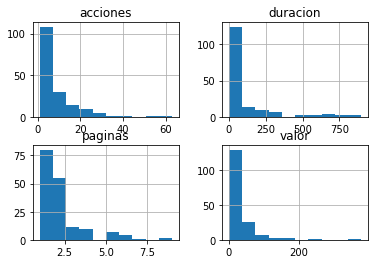

In [8]:
dataframe.drop(['clase'],1).hist()
plt.show()

Ademas se pueden interrelacionar las entradas de a pares, para ver como se concentraron linealmente las salidas de usuarios por colores: sistema operativo Windows en azul, Macintosh en verde y linux en rojo. 

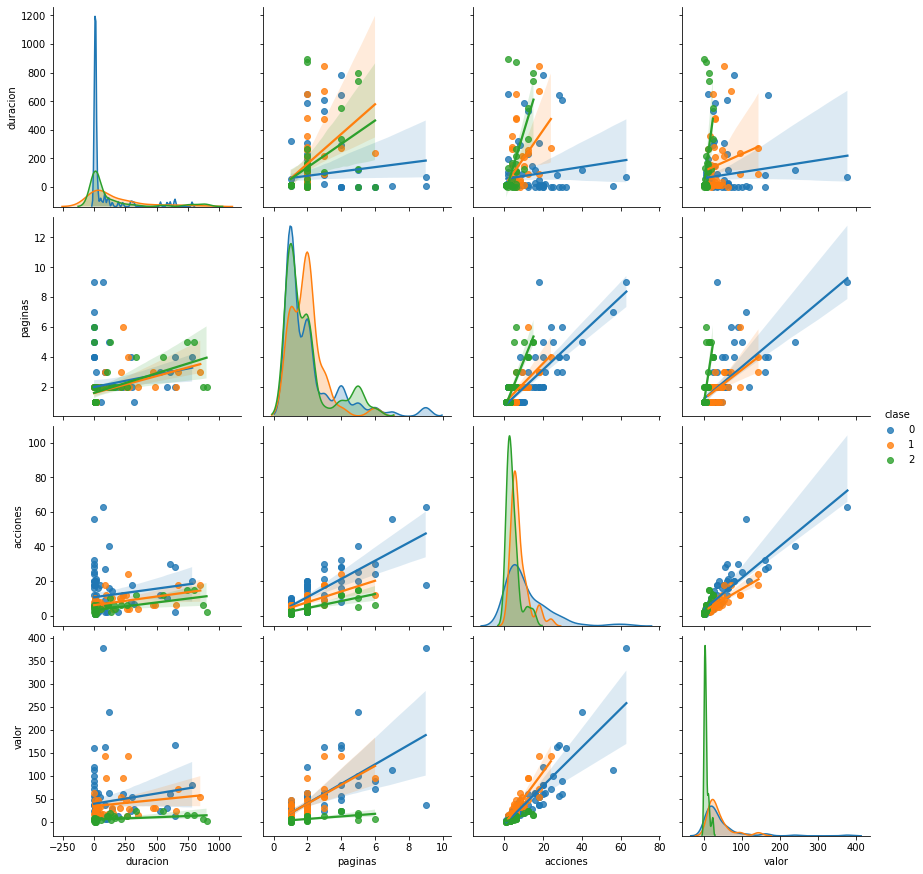

In [9]:
sb.pairplot(dataframe.dropna(), hue='clase',height=3,vars=["duracion", "paginas", "acciones", "valor"],kind='reg')

### Se establece el modelo de R Log 

se cargan los atributos de las columnas de entrada en x excluyendo la clumna "clase" con el metodo drop(). La columna "clase" se agrega el atributo y se ejecuta X.shape para comprobar la dimension de la matriz con los datos de entrada de 170 registros por 4 columnas.

In [ ]:
x = np.array(dataframe.drop(['calse'],1))
y = np.array(dataframe['clase'])